# Project Description

## Image Classification Using Known CNN Models

### Overview

In this project, we classify images using five well-known Convolutional Neural Network (CNN) models implemented with the Python `keras` library. The models used are `ResNet50`, `VGG16`, `InceptionV3`, `Xception`, and `EfficientNetB7`. The goal is to load an image, pass it through each of these models, and obtain the top prediction for the image. This project consists of two Python scripts: one for defining the CNN models (`cnn_models.py`) and one main script (`main.py`) for classifying an image.

### Project Components

#### 1. `cnn_models.py`

This script defines a class, `cnnModels`, which provides an interface to load and use the pre-trained CNN models. The class includes methods for initializing models, retrieving models by name, and classifying images.

##### `cnnModels` Class

- **`__init__(self)`**: Initializes the class and loads the pre-trained models.
- **`resnet(self)`**: Loads and returns the `ResNet50` model with ImageNet weights.
- **`vggnet(self)`**: Loads and returns the `VGG16` model with ImageNet weights.
- **`inception(self)`**: Loads and returns the `InceptionV3` model with ImageNet weights.
- **`convnet(self)`**: Loads and returns the `Xception` model with ImageNet weights.
- **`efficientnet(self)`**: Loads and returns the `EfficientNetB7` model with ImageNet weights.
- **`get_model(self, name)`**: Retrieves a model by name from the dictionary of models.
- **`classify_image(self, name, img)`**: Classifies an image using the specified model and returns the top 3 predictions.

#### 2. `main.ipynb`

This script demonstrates how to use the `cnnModels` class to classify an image.

##### Example Usage

```python
from cnn_models import cnnModels
from keras.preprocessing.image import load_img

# Specify the image path
img_path = './imgs/dog.jpeg'
img = load_img(img_path)

# Initialize the cnnModels class
model = cnnModels()

# Classify the image using ResNet50
preds1 = model.classify_image('ResNet50', img)

# Print the top predictions
for pred in preds1:
    print(f"{pred[1]}: {pred[2]}, {pred[3]}")


The state-of-the-art CNN models are tested using two datasets: 
1) AI-generated Images that contains 10 images
2) 10 Real Images collected from the internet

average accuracy, precision and recall scores. 

In [1]:
import cnn_models
import pandas as pd
from keras.utils import load_img #type: ignore
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns

real
synthetic


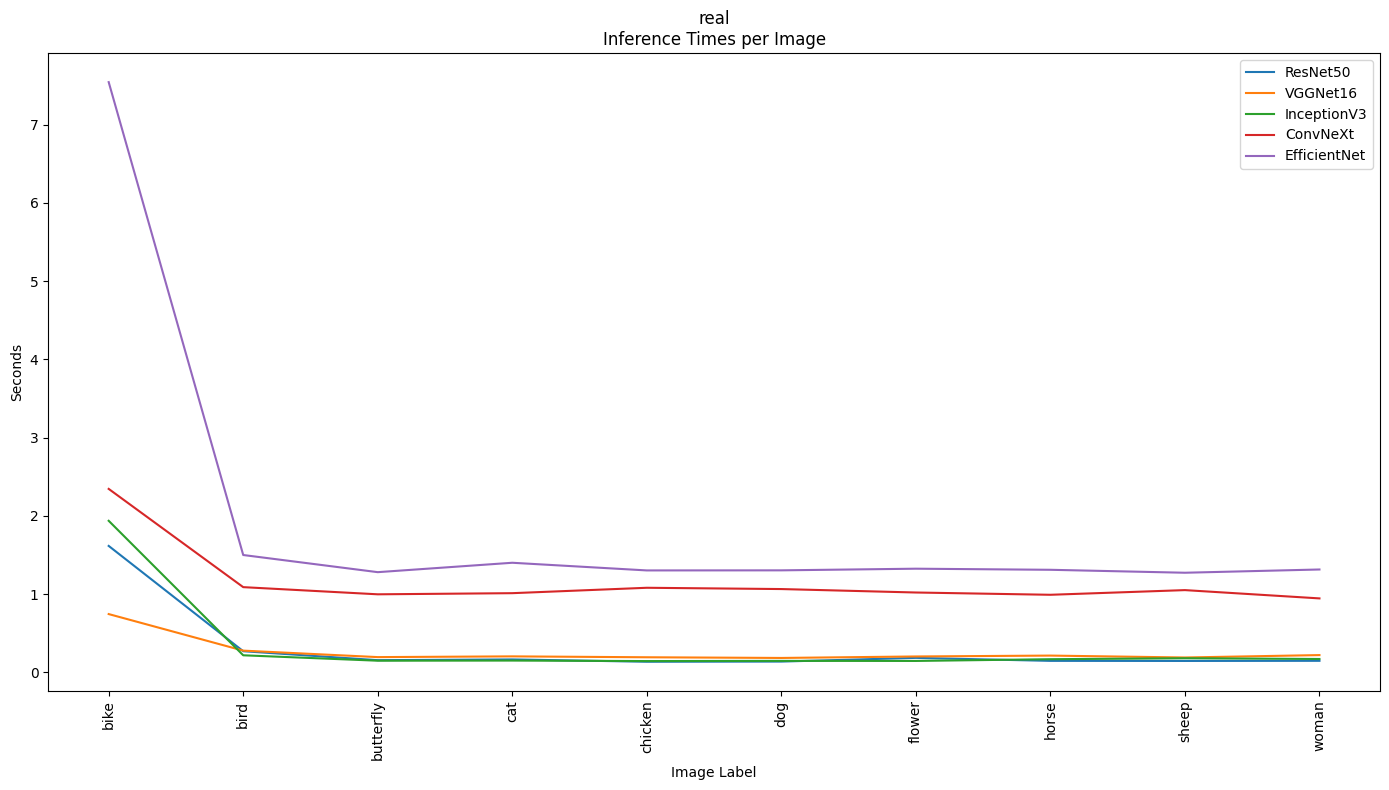

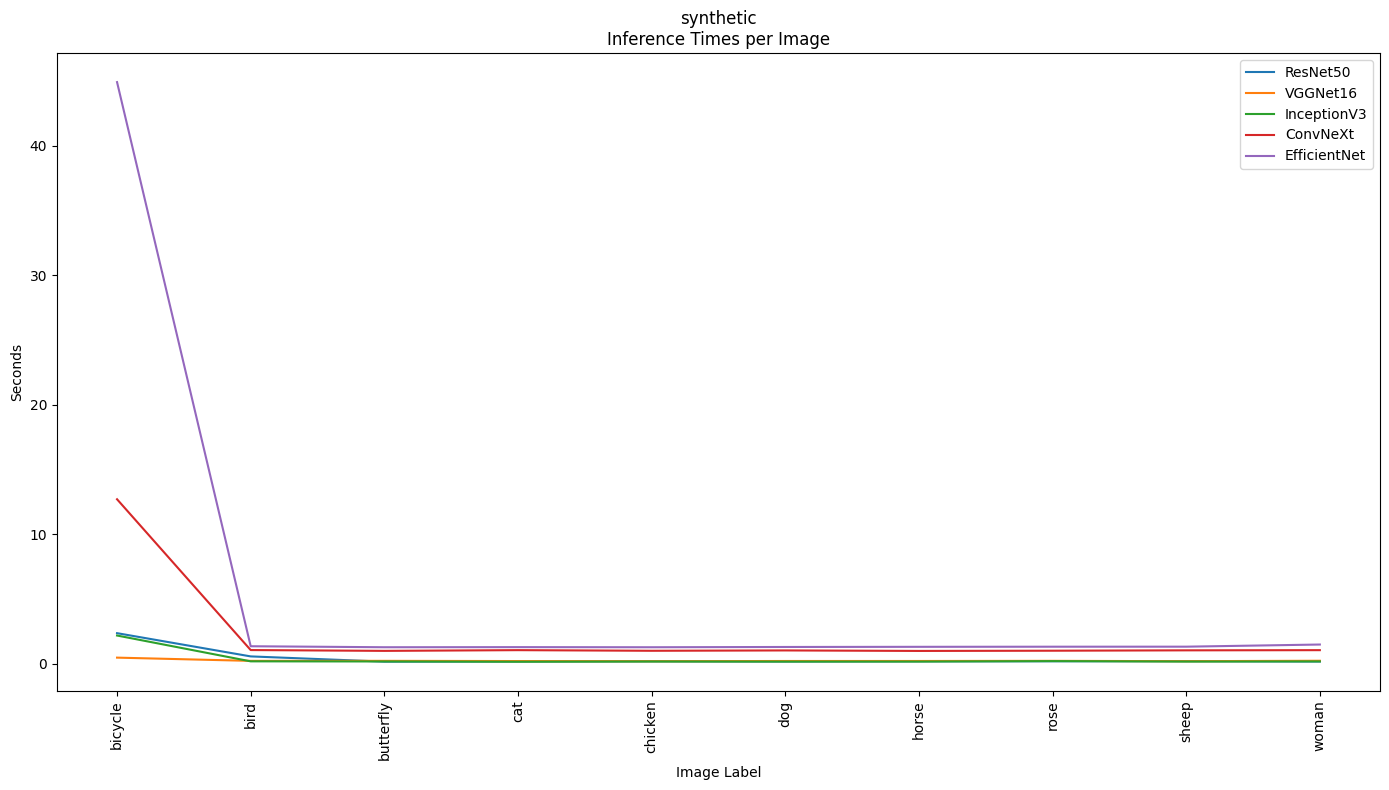

In [5]:
def get_predictions(image_dir):
    names = image_dir.split("dataset/")[-1].split("/")[0]
    print(names)
    
    model = cnn_models.cnnModels()
    model_name = ['ResNet50', 'VGGNet16', 'InceptionV3', 'ConvNeXt', 'EfficientNet']
    
    # Create column names for top-3 predictions and probabilities
    class_cols = [f"{m}_top{i}" for m in model_name for i in range(1, 4)]
    prob_cols = [f"{m}_prob{i}" for m in model_name for i in range(1, 4)]
    addoncolnames = [f"{m}_inference time" for m in model_name]
    
    result_df = pd.DataFrame(columns=class_cols + prob_cols + ['label'])
    resultdf = pd.DataFrame()
    labels = []    
    row_values = []
    addon_values = []
    
    for filename in os.listdir(image_dir):
        if filename.endswith('.jpeg') or filename.endswith('.png')or filename.endswith('.jpg'):
            image_path = os.path.join(image_dir, filename)
            img = load_img(image_path)   
            labels.append(filename.split('.')[0])
            truelabel = filename.split(".")[0]

            image_class_preds = []
            image_prob_preds = []
            pred_times = []
            accuracylist = []
            for name in model_name:
                start_time = time.time()
                # preds = model.classify_image(name, img)[0][0][1:3]
                preds = model.classify_image(name, img)[0]
                inference_time = time.time() - start_time
                pred_times.append(inference_time)
                for i in range(3):
                    image_class_preds.append(preds[i][1])
                    image_prob_preds.append(preds[i][2])
                # class_preds.append(preds[0])
                # prob_preds.append(preds[1])
            # row_values.append(class_preds + prob_preds)
            row_values.append(image_class_preds + image_prob_preds+ [filename.split('.')[0]])
            addon_values.append(pred_times)


    result_df = pd.DataFrame(row_values, columns=class_cols + prob_cols + ['label'])        
    addondf = pd.DataFrame(addon_values, columns=addoncolnames)
    resultdf = pd.concat([result_df, addondf], axis=1)
    # print(resultdf.iloc[:2,0:3])
    ### plot the inference time
    plt.figure(figsize=(14, 8))
    for model_time_col in addoncolnames:
        sns.lineplot(x=resultdf['label'], y=resultdf[model_time_col], label=model_time_col.replace('_inference time', ''))
    
    plt.title(f'{names}\nInference Times per Image')
    plt.ylabel('Seconds')
    plt.xlabel('Image Label')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join('./results', f'{names}_inferencetime.png'))

    return resultdf


# Run on your datasets
fake_dir = './dataset/synthetic/'
real_dir = './dataset/real/'

real_result = get_predictions(real_dir)
fake_result = get_predictions(fake_dir)

real_result.to_csv('./results/real_result.csv', index=False)
fake_result.to_csv('./results/fake_result.csv', index=False)


test2
test1


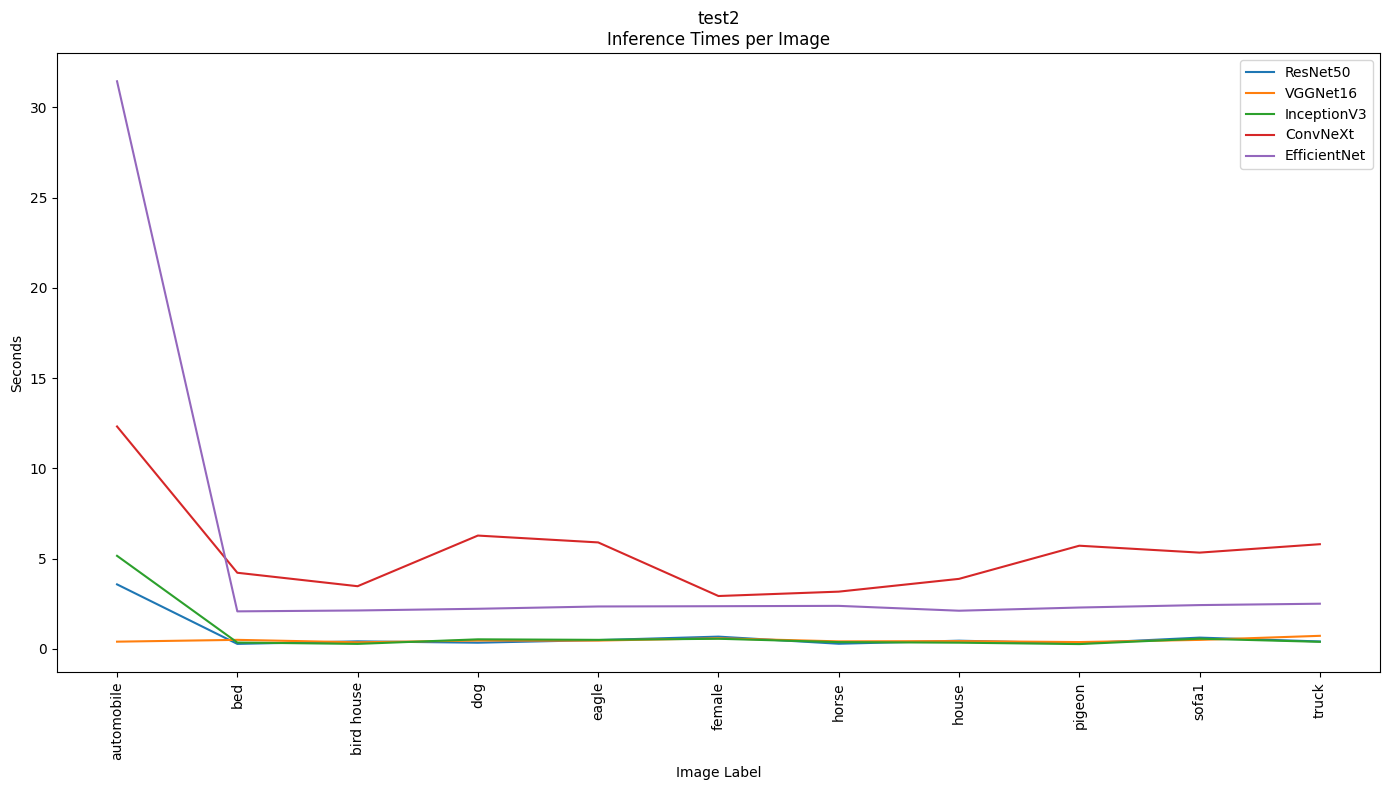

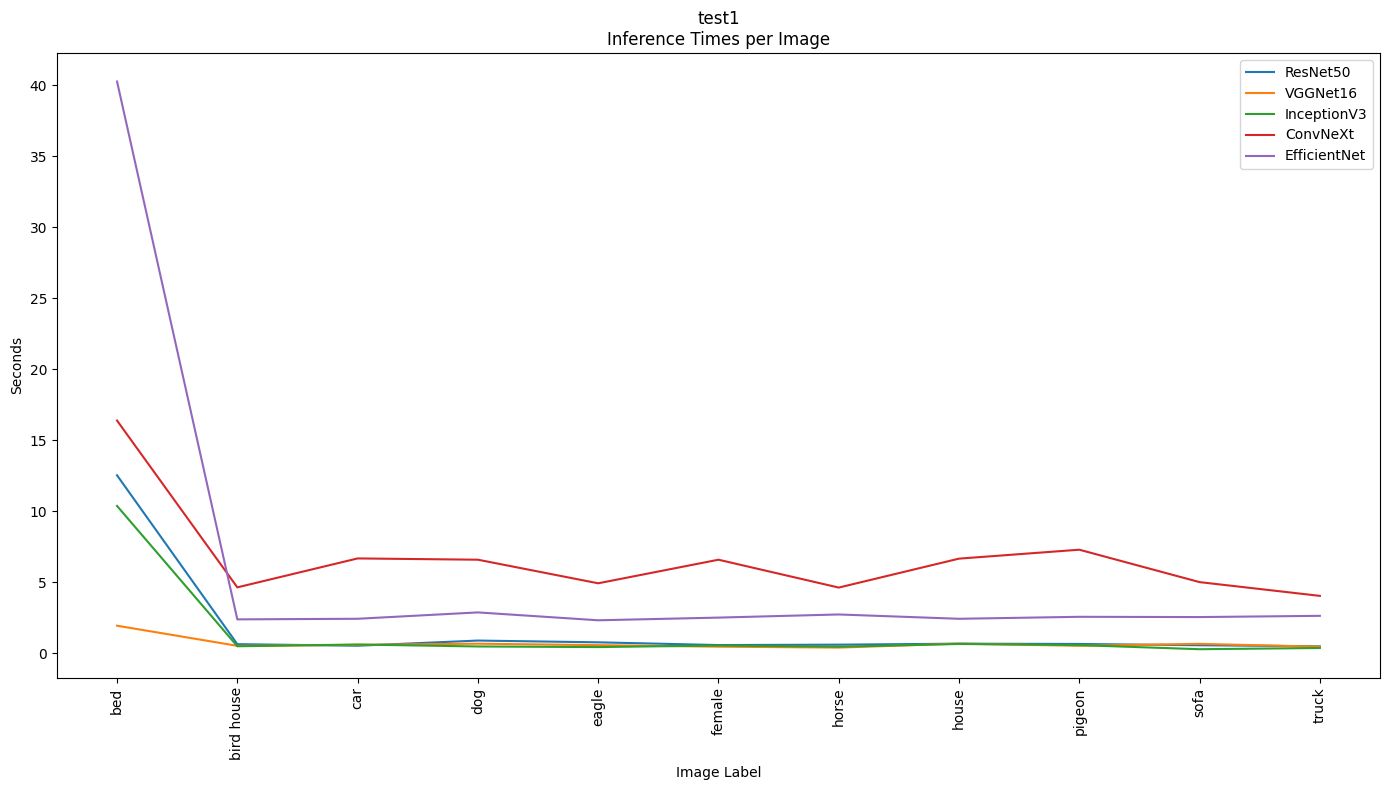

In [6]:
test1_dir = './dataset/test1/'
test2_dir = './dataset/test2/'
test2_result = get_predictions(test2_dir)
test1_result = get_predictions(test1_dir)
test2_result.to_csv('./results/test2_result.csv', index = False)
test1_result.to_csv('./results/test1_result.csv', index = False)

{'ResNet50': {'ModelSize_MB': 103.11, 'MemoryUsage_MB': 97.8}, 'VGGNet16': {'ModelSize_MB': 553.51, 'MemoryUsage_MB': 527.79}, 'InceptionV3': {'ModelSize_MB': 96.36, 'MemoryUsage_MB': 90.99}, 'ConvNeXt': {'ModelSize_MB': 114.84, 'MemoryUsage_MB': 109.06}, 'EfficientNet': {'ModelSize_MB': 268.98, 'MemoryUsage_MB': 254.28}}


ResNet50: Size = 103.11 MB, RAM = 97.8 MB
VGGNet16: Size = 553.51 MB, RAM = 527.79 MB
InceptionV3: Size = 96.36 MB, RAM = 90.99 MB
ConvNeXt: Size = 114.84 MB, RAM = 109.06 MB
EfficientNet: Size = 268.98 MB, RAM = 254.28 MB


C:\Users\Peter_PPT\AppData\Local\Temp\ipykernel_45108\3180437012.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=modelstats, x='Model', y='Model Size (MB)', palette='Blues_d')
C:\Users\Peter_PPT\AppData\Local\Temp\ipykernel_45108\3180437012.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=modelstats, x='Model', y='Memory Usage (MB)', palette='Blues_d')


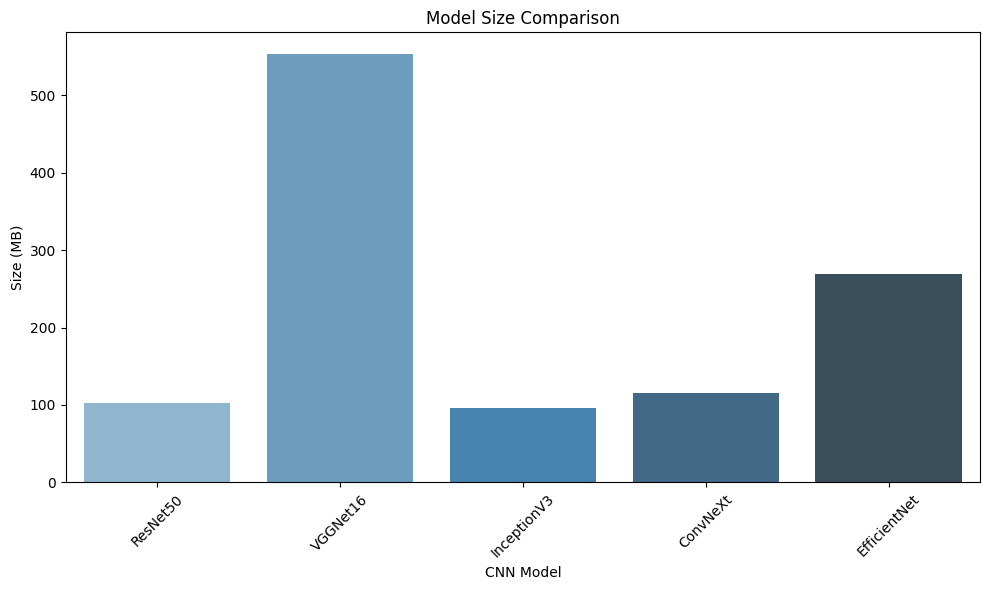

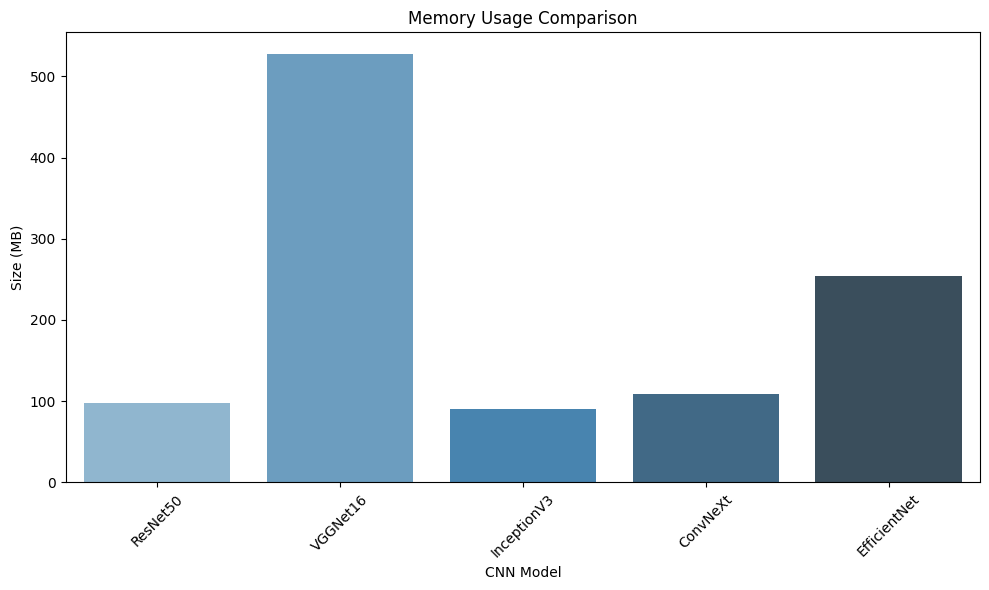

In [4]:

modelsize = []
memoryusage = []
modename=[]
cnnmodels = cnn_models.cnnModels()
print(cnnmodels.get_model_stats())
stats =cnnmodels.get_model_stats()

for name, values in stats.items():
    print(f"{name}: Size = {values['ModelSize_MB']} MB, RAM = {values['MemoryUsage_MB']} MB")
    modelsize.append(values['ModelSize_MB'])
    memoryusage.append(values['MemoryUsage_MB'])
    modename.append(name)
modelstats = pd.DataFrame()
modelstats['Model']=modename
modelstats['Model Size (MB)']=modelsize
modelstats['Memory Usage (MB)']=memoryusage
plt.figure(figsize=(10, 6))
sns.barplot(data=modelstats, x='Model', y='Model Size (MB)', palette='Blues_d')
plt.title('Model Size Comparison')
plt.ylabel('Size (MB)')
plt.xlabel('CNN Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join('./results','modelsize.png'))
plt.figure(figsize=(10, 6))
sns.barplot(data=modelstats, x='Model', y='Memory Usage (MB)', palette='Blues_d')
plt.title('Memory Usage Comparison')
plt.ylabel('Size (MB)')
plt.xlabel('CNN Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join('./results','memory usage.png'))
